# OpenCV Workshop

CSCI 4360/6360 Data Science II

Gabrielle, Albert, and Ben

## Basics of OpenCV

![OpenCV](../images/logos/OpenCV_logo.png)

An open source computer vision library.
- Machine learning and computer vision algorithms
- Focused on real-time solutions
- Written in C and C++
    - It’s fast!
    - GPU-acceleration (CUDA and OpenCL)

# OpenCV wrappers

![Python logo](../images/logos/Python_logo.png)

OpenCV has a wrapper for Python

- e.g., [OpenCV–Python](https://pypi.org/project/opencv-python/)

    - *also for Java, Ruby, and Matlab!*


# Importing modules

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 # OpenCV
import glob # loading paths

In [2]:
# load all images (pngs)
images = glob.glob('../images/**.png')

## Reading images

Loading rgb images as rgb images and greyscale images.

In [3]:
# load as color image
img = cv2.imread(images[0], cv2.IMREAD_COLOR)

# load as grayscale
img_gray = cv2.imread(images[0], cv2.IMREAD_GRAYSCALE)

*Alternatively*, you can use integers (1, 0, -1) as flags *in lieu* of writing out `cv2.IMREAD_COLOR`, `cv2.IMREAD_GRAYSCALE`, *etc.*

In [4]:
# load color image with integers
img = cv2.imread(images[0], 1)

# grayscale
img_gray = cv2.imread(images[0], 0)

# Displaying images

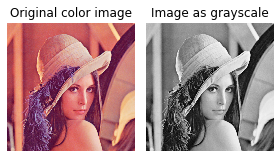

In [5]:
# display color and grayscale images
fig, axes = plt.subplots(1, 2, figsize=(4, 4), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].set_title("Original color image")
ax[0].imshow(img[...,::-1], interpolation = "nearest")

ax[1].set_title("Image as grayscale")
ax[1].imshow(img_gray, cmap=plt.cm.Greys_r, interpolation = "nearest")

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

## NumPy and OpenCV

With OpenCV, we're working with large NumPy arrays.


- For **color** images, they are 3 dimensional arrays.
- And **grayscale** images, they are 2 dimensional.

For color images:

`img[0,0,0]` $\rightarrow$ top-left pixel value in our Blue channel (we'll discuss this below)

For grayscaled images,

`img_gray[0,0]` $\rightarrow$ top-left pixel intensity value

In [6]:
print('Color image\n-------\nImage shape: {}\ntype: {}\nData type: {}\nDimensions: {}'
      .format(img.shape, type(img), img.dtype, img.ndim)
     )

Color image
-------
Image shape: (512, 512, 3)
type: <class 'numpy.ndarray'>
Data type: uint8
Dimensions: 3


In [7]:
print('Grayscale image\n-------\nImage shape: {}\ntype: {}\nData type: {}\nDimensions: {}'
      .format(img_gray.shape, type(img_gray), img_gray.dtype, img_gray.ndim)
     )

Grayscale image
-------
Image shape: (512, 512)
type: <class 'numpy.ndarray'>
Data type: uint8
Dimensions: 2


## Cropping images

Okay, let's examine a small section of the image (region of interest (ROI)). Selecting the eye of the lenna.png.

In [8]:
# select region of interest using numpy indexing
img_roi = img_gray[250:280, 240:295]

In [9]:
print(img_roi)

[[199 197 180 ... 157 166 174]
 [200 192 174 ... 131 146 158]
 [197 188 169 ... 110 131 145]
 ...
 [149 144 146 ... 139 137 142]
 [151 151 149 ... 137 143 144]
 [151 156 146 ... 142 144 144]]


Since, our image is grayscale

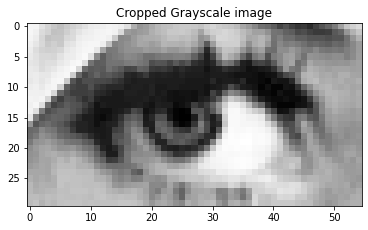

In [10]:
# plot  image
plt.title("Cropped Grayscale image")
plt.imshow(img_roi, cmap=plt.cm.Greys_r, interpolation = "nearest")
plt.show()

# Color format

For OpenCV images we work in the **BGR** format –> Blue intensity, Green intensity, and Red intensity.


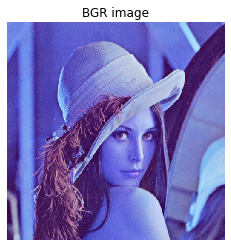

In [11]:
# plot image
plt.title("BGR image")
plt.imshow(img, interpolation = "nearest")
plt.axis('off')
plt.show()

## Converting between color format

The keen-eyed may have noticed that when plotting with matplotlib above, we reindexed our color image before plotting `img[...,::-1]`. OpenCV loads images in BGR mode, however, matplotlib and other software use RGB. Therefore, here, we reordered the image dimensions (the color channels) to reflect appear correctly.


In [12]:
# splitting the color channels
channels = cv2.split(img)
titles = ['Blue channel', 'Green channel', 'Red channel']

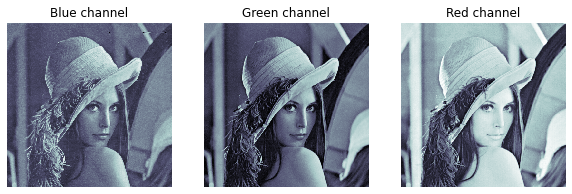

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=len(channels), figsize=(10,10), sharex='all', sharey='all')

for idx, (channel, title) in enumerate(zip(channels, titles)):
    axes[idx].set_title(title)
    axes[idx].set_axis_off()
    axes[idx].imshow(channel, cmap=plt.cm.bone, interpolation = "nearest")

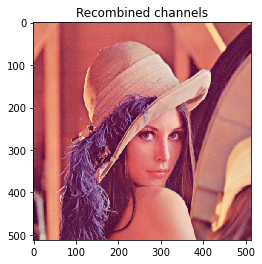

In [14]:
# recombine separated channels
recombined = cv2.merge((channels))

# Recombine separated channels
plt.title("Recombined channels")
plt.imshow(recombined[...,::-1], interpolation = "nearest")
plt.show()

## Color spaces

*Why would you need to switch between color spaces?*

1. Utilize functions within other libraries

    - Scikit-image and PIL use RGB

2. Task specific colorspaces 
    - certain image processing task may work better with particular colorspaces 
    - ex: HSV and image segmentation (see [skimage example](https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_rgb_to_hsv.html#sphx-glr-auto-examples-color-exposure-plot-rgb-to-hsv-py))

In [15]:
# convert to rgb
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

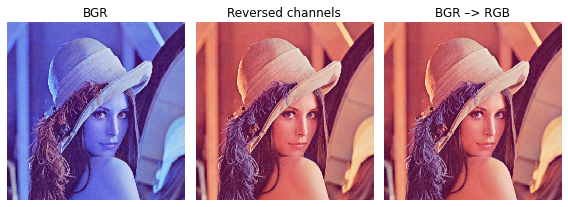

In [16]:
# display original color and BGR converted image
fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].set_title("BGR")
ax[0].imshow(img, interpolation = "nearest")

ax[1].set_title("Reversed channels")
ax[1].imshow(img[...,::-1], interpolation = "nearest")

ax[2].set_title("BGR –> RGB")
ax[2].imshow(img_rgb, interpolation = "nearest")

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

# Image transformations

Basic geometric manipulation of our grayscale image. Rotations happen around **top-left** corner.

In [17]:
# basic rotation
img_rot1 = cv2.rotate(img_gray, cv2.ROTATE_90_CLOCKWISE)
img_rot2 = cv2.rotate(img_gray, cv2.ROTATE_180)
img_rot3 = cv2.rotate(img_gray, cv2.ROTATE_90_COUNTERCLOCKWISE)

In [18]:
titles = ['Original color image', '90° clockwise', '180° rotation', '90° counterclockwise rotation']
images_rotated = [img_gray, img_rot1, img_rot2, img_rot3]

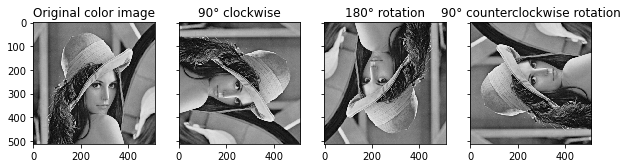

In [19]:
# plot rotated images
fig, axes = plt.subplots(nrows=1, ncols=len(images_rotated), figsize=(10,10), sharex='all', sharey='all')

for idx, (img_rotation, title) in enumerate(zip(images_rotated, titles)):
    axes[idx].set_title(title)
    axes[idx].imshow(img_rotation, cmap = plt.cm.gray, interpolation = "nearest")

## Rotation with Matrix transformation

Similarly, you can transform images with matrices.

The function `getRotationMatrix2D()` takes a point to rotate the image around (here we're using the center of the image), angle in degree, and scale.

In [20]:
M1 = cv2.getRotationMatrix2D((img_gray.shape[0]/2 , img_gray.shape[1]/ 2), 90, 1)
print('This is a rotation matrix:\n{}'.format(M1))

This is a rotation matrix:
[[ 6.12323400e-17  1.00000000e+00 -2.84217094e-14]
 [-1.00000000e+00  6.12323400e-17  5.12000000e+02]]


In [21]:
rotations = [0, -90, 180, 90]
titles = ["Original color image", "90° clockwise", "180° rotation", "90° counterclockwise"]

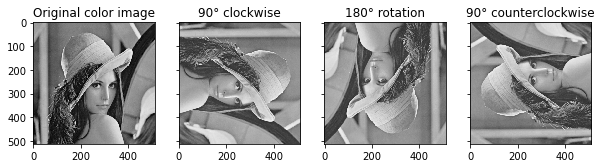

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=len(rotations), figsize=(10,10), sharex='all', sharey='all')

for idx, (rotation, title) in enumerate(zip(rotations, titles)):
    M = cv2.getRotationMatrix2D((img_gray.shape[0] / 2 , img_gray.shape[1] / 2), rotation, 1)
    img_rotated = cv2.warpAffine(img_gray, M, (img_gray.shape[0], img_gray.shape[1]))
    axes[idx].set_title(title)
    axes[idx].imshow(img_rotated, cmap = plt.cm.gray, interpolation = "nearest")

# Translations

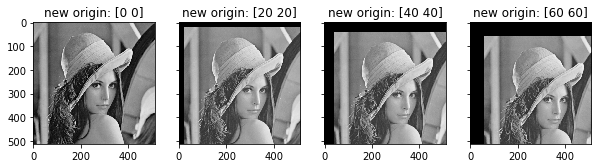

In [23]:
# translation
fig, axes = plt.subplots(nrows=1, ncols=len(rotations), figsize=(10,10), sharex='all', sharey='all')

for idx in range(4):
    M  = np.array([[1,0],[0,1]])
    trl = np.array([[20],[20]]) * idx
    M = np.c_[M, trl].astype(np.float64)
    img_rotated = cv2.warpAffine(img_gray, M, (img_gray.shape[0], img_gray.shape[1]))
    title = '{}: {}'.format('new origin', str(trl.flatten()))
    axes[idx].set_title(title)
    axes[idx].imshow(img_rotated, cmap = plt.cm.gray, interpolation = "nearest")

In [24]:
print(M)

[[ 1.  0. 60.]
 [ 0.  1. 60.]]


# Saving images

OpenCV offers methods for saving your images.

In [25]:
cv2.imwrite('../images/img_gray.jpg', img_gray)

True

Supports .PNG, JPEG 2000, and TIFF filetypes. However, you can always use

In [26]:
np.save('../images/img_gray',img_gray, allow_pickle=True, fix_imports=True)
npim = np.load('../images/img_gray.npy')

# Write videos

Writing videos from a sequence of images.

In [27]:
# load and sort images
images = sorted( glob.glob( '../images/optical-flow/**.png' ) )
print(images)

['../images/optical-flow/optical-flow-01.png', '../images/optical-flow/optical-flow-02.png']


In [28]:
# create a list of images (list comprehension)
img_list = [cv2.imread(x) for x in images]

get the size of the images.

In [29]:
size = img_list[0].shape[0:2][::-1]

`VideoWriter()` function parameters:

- **file name**: name of output file
- **Codec**: image codec for writing video
- **fps**: frames per second
- **size**: width and height


In [30]:
# create video from images
out = cv2.VideoWriter('../images/optical-flow/optical-flow.avi', cv2.VideoWriter_fourcc(*'DIVX'), 1, size)

for i in range(len(img_list)):
    out.write(img_list[i])
out.release()

### loading videos

In [31]:
# load a video with path
cap = cv2.VideoCapture('../images/optical-flow/optical-flow.avi')

### reading in frames

In [32]:
# returns index and frame
ret, frame_0 = cap.read()

# Calculating Optical flow

- OpenCV has two built-in methods for calculating optical flow:

1. `calcOpticalFlowPyrLK()`
2. `calcOpticalFlowFarneback()`


### Load images

- Since we're only working with two frames we'll use images rather than the video.

In [33]:
# previous frame
frame_0 = cv2.imread('../images/optical-flow/optical-flow-01.png', 1)

# convert t (previous) to grayscale
gray_0 = cv2.cvtColor(frame_0, cv2.COLOR_BGR2GRAY)

# read t+1 (next frame) as grayscale
gray_1 = cv2.imread('../images/optical-flow/optical-flow-02.png', 0)

In [34]:
# create empty array
hsv = np.zeros_like(frame_0)

# assign Saturation channel a constant value
hsv[..., 1] = 255

Here, were using the Gunnar Farneback's optical flow algorithm (Farneback 2003). Which is considered to be a more robust method since it accounts for inconsistencies in a motion field.

calculate flow vectors $(\vec{u}, \vec{v})$

In [35]:
# parameters for the optical flow algorithm
# calculate u and v vectors.

pyr_scale =  0.25      # pyramid size
levels =     200       # number of layers
winsize =     15      # window size
iterations = 100       # iterations
blocksize =  5       # neighborhood size
offset =     1.2      # neighborhood size offset

In [36]:
flow = cv2.calcOpticalFlowFarneback(gray_0, gray_1, None, pyr_scale, levels, winsize, iterations, blocksize, offset,  0)

# Optical Flow

(Recall from lecture 6 on Dense Motion analysis)

- Motion, or *displacement*, at all pixels
    - displacement is a vector (magnitude and direction).

    - Magnitude: saturation
    - Orientation: hue

In [37]:
# calculate the magnitude and angle of vector
mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])

# convert to degree
#hsv[..., 0] = ang*180/np.pi/2
hsv[..., 0] = np.rad2deg(ang/2)

# rescale intensities to (0, 255)
hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)

In [38]:
# convert hue, saturation, value to 
image_rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

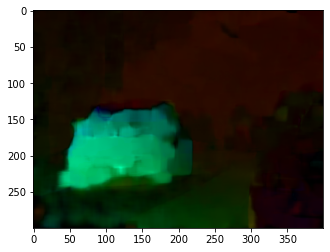

In [39]:
# plot optical flow
plt.imshow(image_rgb)
plt.show()

cool application of optical flow for [image registration](https://scikit-image.org/docs/dev/auto_examples/registration/plot_opticalflow.html)

# Dynamic Textures

From homework #2, we implemented a basic LDS to model a dynamic texture.

- Recall, this required us to calculate an appearance model and a state-space model.

**The appearance model**:  $\vec{y}_{t} = C \vec{x}_{t} + \vec{u}_{t}$

**The state model**:       $\vec{x}_{t} = A \vec{x}_{t - 1} + W\vec{v}_{t}$

In [40]:
# load data
dt1 = np.load('../images/dt1_train.npy')

So, we could have visualized the image sequence we worked with:

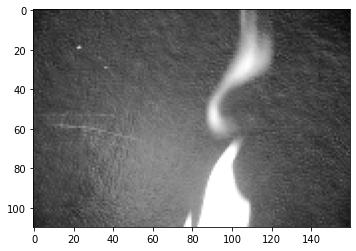

In [41]:
# plot the first image of sequence
plt.imshow(dt1[1,::], cmap = plt.cm.gray)
plt.show()

## Singular vector decomposition

Recall we used SVD to derive $C$, the *output matrix*, which maps between spaces.


In [42]:
Sigma, U, V = cv2.SVDecomp( dt1[1,::] )

This`cv2.SVDecomp()` is the OpenCV equivalent to `np.linalg.svd(dt1[1,::])`

In [43]:
qs = [1, 3, 5, 12]

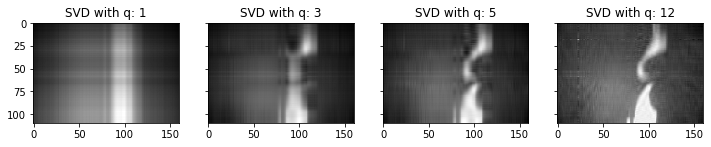

In [44]:
# plotting the first image varying q
fig, axes = plt.subplots(nrows=1, ncols=len(qs), figsize=(12,12), sharex='all', sharey='all')

for idx, q in enumerate(qs):
    img2 = np.matrix(U[:, :q]) * np.diagflat(Sigma[:q]) * np.matrix(V[:q, :])
    title = '{}: {}'.format('SVD with q', str(q) )
    axes[idx].set_title(title)
    axes[idx].imshow(img2, cmap = plt.cm.gray, interpolation = "nearest")

# KNN


In [45]:
# Read in training and test digits
digits = cv2.imread('../Digits/digits.png', cv2.IMREAD_GRAYSCALE)
test_digits = cv2.imread('../Digits/test_digits.png', cv2.IMREAD_GRAYSCALE)

Populating the interactive namespace from numpy and matplotlib


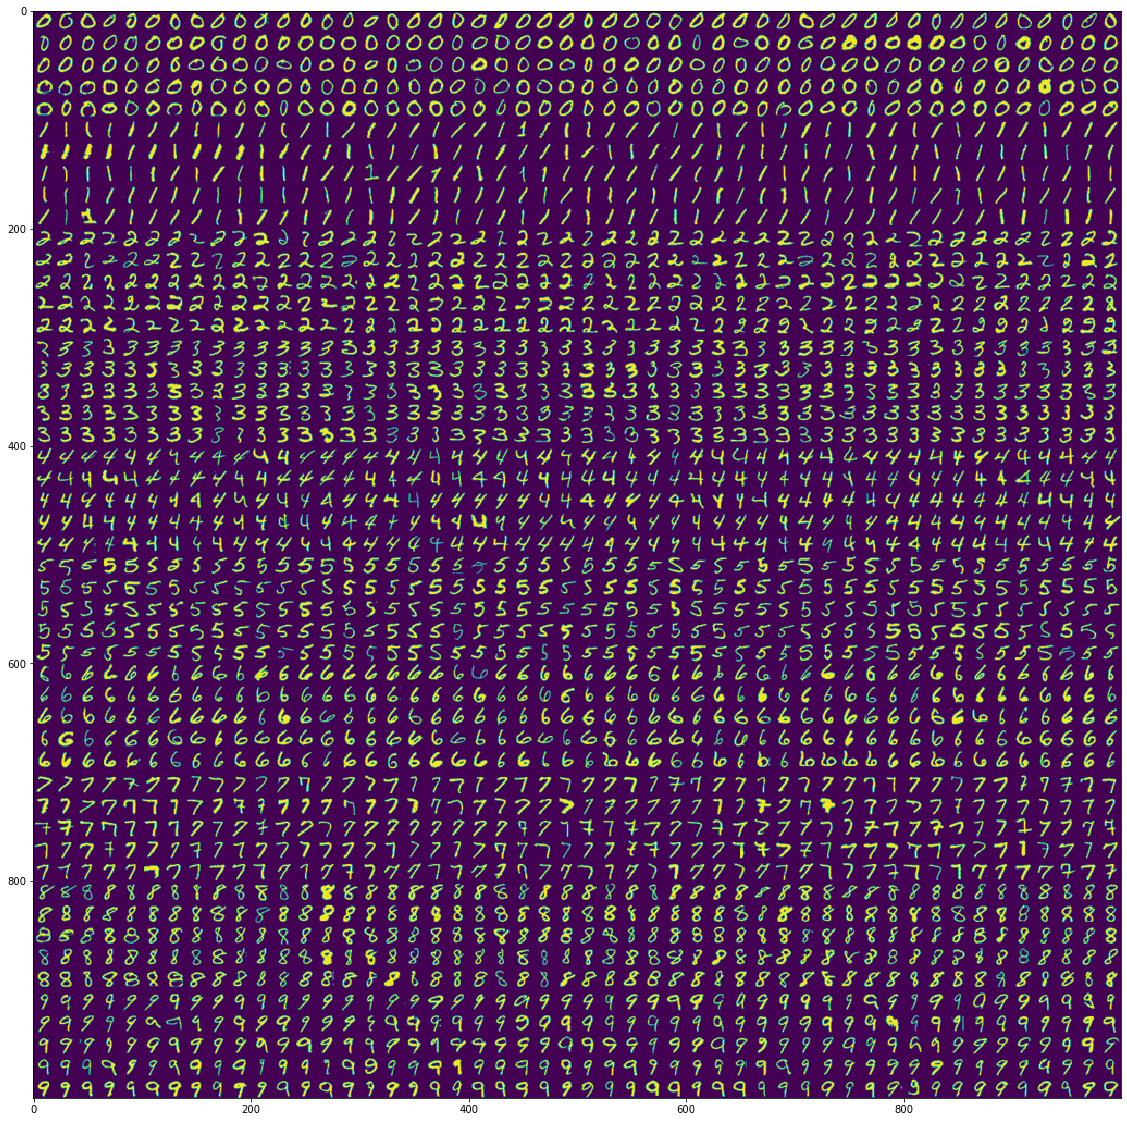

In [47]:
%pylab inline

# Show the training image of digits
plt.figure(figsize = (20,20))
plt.imshow(digits, interpolation='nearest')
plt.show()

In [48]:
# Splits an array row-wise
rows = np.vsplit(digits, 50)
cells = []
for row in rows:
    # Splits array col wise
    row_cells = np.hsplit(row, 50)
    for cell in row_cells:
        cell = cell.flatten()
        cells.append(cell)
cells = np.array(cells, dtype=np.float32)

In [49]:
# Evenly space the values to get the labels
k = np.arange(10)
cells_labels = np.repeat(k, 250)

In [50]:
# create the test cells
test_digits = np.vsplit(test_digits, 50)
test_cells = []
for d in test_digits:
    d = d.flatten()
    test_cells.append(d)
test_cells = np.array(test_cells, dtype=np.float32)

In [51]:
# Utilize openCV's 
knn = cv2.ml.KNearest_create()
knn.train(cells, cv2.ml.ROW_SAMPLE, cells_labels)
ret, result, neighbours, dist = knn.findNearest(test_cells, k=3)

In [38]:
print(result)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [0.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [3.]
 [5.]
 [1.]
 [5.]
 [3.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [8.]
 [1.]
 [8.]
 [8.]
 [8.]
 [9.]
 [9.]
 [9.]
 [9.]
 [9.]]


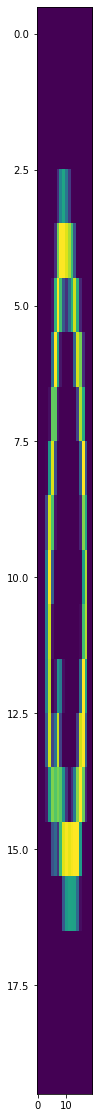

In [43]:
plt.figure(figsize = (1,20))
plt.imshow(test_digits[1], interpolation='nearest', aspect = 'auto')

In [53]:
accuracy = 0
labelValue = 0
count = 1

for i in result:
    if int(i[0]) == labelValue: 
        accuracy += 1
    if count % 5 == 0:
        labelValue+=1
    count += 1
print("accuracy", "{:.0%}".format(accuracy/50))

accuracy 90%


 # K-Means Clustering

**Example**: Nike wants to come out with a new shorts design. The company needs to determine the different sizes, so they compile the data of people's height and weight. After plotting the data, K-means clustering will divide the it into the best two groups for the sizes.

**Steps**: First, the algorithm randomly chooses two centroids. Next, the distance between each point and the centroid is calculated and the closer one is which group it is associated with. Finally, many iterations occr until the distance is a minimum.

### The Final Result After Many Iterations

$$min\left[\ J\ =\sum_\text{All Red Points} \text{distance}(C_1, \text{Red Point})\ +\sum_\text{All Blue Points} \text{distance}(C_2,\text{Blue Point})\ \right]$$

![kmeans](../images/kmeans.png)

# Resources

[OpenCV](https://opencv.org/)

[Scikit-image](https://scikit-image.org/)

[OpenCV Python tutorials](https://opencv24-python-tutorials.readthedocs.io/)

[Learn OpenCV](https://learnopencv.com/)

> Stéfan van der Walt, Johannes L. Schönberger, Juan Nunez-Iglesias, François Boulogne, Joshua D. Warner, Neil Yager, Emmanuelle Gouillart, Tony Yu and the scikit-image contributors. scikit-image: Image processing in Python. PeerJ 2:e453 (2014) https://doi.org/10.7717/peerj.453

> Farnebäck G. (2003) Two-Frame Motion Estimation Based on Polynomial Expansion. In: Bigun J., Gustavsson T. (eds) Image Analysis. SCIA 2003. Lecture Notes in Computer Science, vol 2749. Springer, Berlin, Heidelberg. https://doi.org/10.1007/3-540-45103-X_50

